In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("dataset.csv")
df.head()

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True


In [102]:
df.shape # We have 2000 observation for each feature

(1999, 5)

In [103]:
df.isnull().sum() # Also we have some missing values, we need to analyze them.

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64

In [104]:
df.describe() 

,feature_1,feature_2,feature_3,feature_4
count,1897.000000,1899.000000,1893.000000,1897.000000
mean,0.814404,1.795843,2.621096,0.807499
std,1.729538,1.605611,1.474973,1.768597
min,-2.285499,-7.363119,-5.363119,-3.006499
25%,-0.556433,0.975148,1.671905,-0.563357
50%,0.084789,1.881904,2.499623,0.021857
75%,2.270955,2.840511,3.470200,2.319822
max,5.929096,7.549658,9.549658,5.759355


Even though they have similar numbers, there is a difference between the averages. There are also features whose minimum values differ too much. We will examine these further in the **outlier observation analysis**.

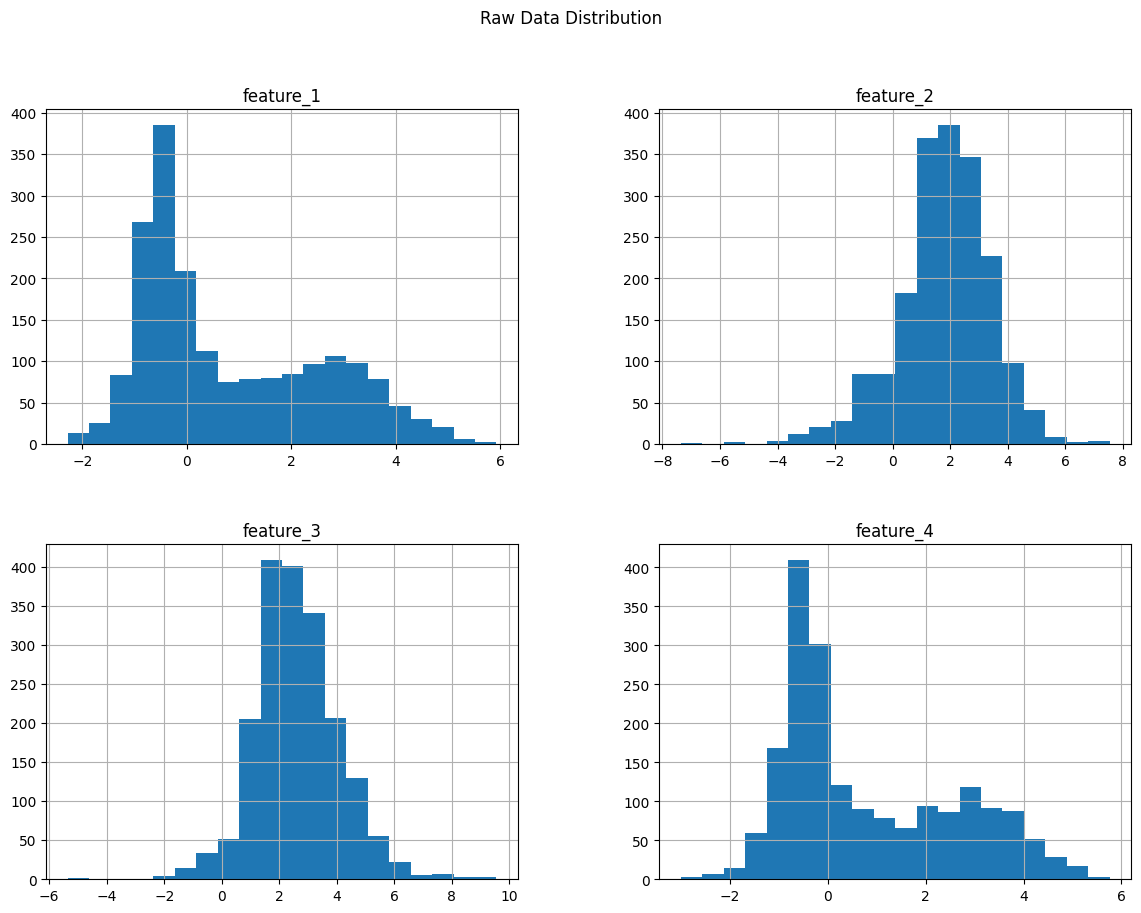

In [105]:
df.hist(bins=20, figsize=(14, 10))
plt.suptitle('Raw Data Distribution')
plt.show()

It is clearly seen in the histogram graphs that features 1 and 4 are skewed to the left and feature 2 is skewed to the right. Also, in feature 3, it does not seem to show a normal distribution, but rather it looks sharper.<br>
**Looks like we have lots to do**

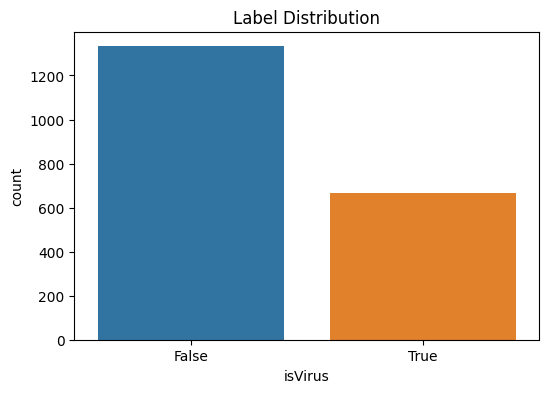

In [106]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isVirus', data=df)
plt.title('Label Distribution')
plt.show()

We have lots of **False** label.

**Lets start with outliers analysis**<br>
I want to get rid of outlier observations with the IQR method. This is because this method is robust to very extreme values and objectively identifies outliers based on the quartiles of the data distribution. This method is especially effective on numerical data and data sets with different distributions between features.

**Feature1**

In [107]:
df_feature1 = df["feature_1"]
df_feature1.head()

0   -0.233467
1    1.519003
2    0.400640
3   -1.616474
4    1.480515
Name: feature_1, dtype: float64

In [108]:
Q1 = df_feature1.quantile(0.25)
Q3 = df_feature1.quantile(0.75)

IQR = Q3 - Q1

print(Q1, Q3, IQR)

-0.5564329999054419 2.2709553412053043 2.8273883411107463


In [109]:
low_limit = Q1 - 1.5*IQR # This is our limits for feature1
up_limit = Q3 + 1.5*IQR

print(low_limit, up_limit)

-4.797515511571562 6.5120378528714244


In [110]:
condition = ((df_feature1 < low_limit) | (df_feature1 > up_limit))

df_feature1[condition]

Series([], Name: feature_1, dtype: float64)

In [111]:
df_feature1.index

RangeIndex(start=0, stop=1999, step=1)

No outlier observations were found for feature_1 with the IQR approach. There are no extreme outliers for feature_1

**Feature_2**

In [112]:
df_feature2 = df["feature_2"]
df_feature2.head()

0    0.308799
1    1.238482
2    1.916748
3    0.209703
4    5.299829
Name: feature_2, dtype: float64

In [113]:
Q1 = df_feature2.quantile(0.25)
Q3 = df_feature2.quantile(0.75)

IQR = Q3 - Q1

print(Q1, Q3, IQR)

0.9751484140477873 2.8405113273015674 1.8653629132537801


In [114]:
low_limit = Q1 - 1.5*IQR # This is our limits for feature2
up_limit = Q3 + 1.5*IQR

print(low_limit, up_limit)

-1.8228959558328828 5.6385556971822375


In [115]:
condition = ((df_feature2 < low_limit) | (df_feature2 > up_limit)) # for feature_2 we found 58 outlier value

df_feature2[condition].size

58

Let's set the outliers we caught equal to the limit they are close to using the suppression method.

In [116]:
df_feature2_low = ((df_feature2 < low_limit))
df_feature2[df_feature2_low].size

50

In [117]:
df_feature2_up = ((df_feature2 > up_limit))
df_feature2[df_feature2_up].size


8

In [118]:
df_feature2[df_feature2_low] = low_limit
df_feature2[df_feature2_up] = up_limit


C:\Users\acer\AppData\Local\Temp\ipykernel_13932\1666122247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature2[df_feature2_low] = low_limit
C:\Users\acer\AppData\Local\Temp\ipykernel_13932\1666122247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature2[df_feature2_up] = up_limit


In [120]:
df_feature2[condition].index

Int64Index([  12,   18,   21,   24,   33,   43,   47,   77,   82,   86,   92,
             100,  105,  116,  139,  143,  150,  152,  173,  187,  209,  211,
             217,  220,  222,  232,  242,  244,  256,  265,  273,  291,  316,
             341,  351,  363,  382,  394,  395,  417,  435,  450,  451,  464,
             467,  472,  480,  493,  510,  518,  537,  553,  570,  585,  612,
             621,  642, 1333],
           dtype='int64')

In [133]:
print(df_feature2[1333], df_feature2[47]) # We arranged the outliers as we wanted with the suppression method.

5.6385556971822375 -1.8228959558328828


In [134]:
df["feature_2"] = df_feature2

**Feature 3**

In [135]:
df_feature3 = df["feature_3"]
df_feature3.head()

0    2.484015
1    3.344450
2    3.291096
3    1.461544
4    2.640670
Name: feature_3, dtype: float64

In [136]:
Q1 = df_feature3.quantile(0.25)
Q3 = df_feature3.quantile(0.75)

IQR = Q3 - Q1

print(Q1, Q3, IQR)

1.6719049826164565 3.4701999189614003 1.7982949363449439


In [137]:
low_limit = Q1 - 1.5*IQR # This is our limits for feature3
up_limit = Q3 + 1.5*IQR

print(low_limit, up_limit)

-1.0255374219009592 6.167642323478816


In [138]:
condition = ((df_feature3 < low_limit) | (df_feature3 > up_limit)) # for feature_3 we found 49 outlier value

df_feature3[condition].size

49

Let's set the outliers we caught equal to the limit they are close to using the suppression method.

In [139]:
df_feature3_low = ((df_feature3 < low_limit))
df_feature3[df_feature3_low].size

17

In [140]:
df_feature3_up = ((df_feature3 > up_limit))
df_feature3[df_feature3_up].size

32

In [141]:
df_feature3[df_feature3_low] = low_limit
df_feature3[df_feature3_up] = up_limit


C:\Users\acer\AppData\Local\Temp\ipykernel_13932\3288168785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature3[df_feature3_low] = low_limit
C:\Users\acer\AppData\Local\Temp\ipykernel_13932\3288168785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature3[df_feature3_up] = up_limit


In [143]:
df_feature3[condition].index

Int64Index([ 655,  658,  660,  662,  667,  672,  679,  712,  720,  732,  738,
             754,  765,  778,  810,  843,  868,  880,  902,  925,  930,  950,
             967,  969,  978, 1026, 1037, 1044, 1054, 1056, 1057, 1058, 1099,
            1106, 1110, 1118, 1150, 1163, 1170, 1178, 1194, 1221, 1235, 1258,
            1288, 1300, 1301, 1331, 1425],
           dtype='int64')

In [144]:
print(df_feature3[655], df_feature3[658])

-1.0255374219009592 6.167642323478816


In [145]:
df_feature3 = df["feature_3"]

**Feature 4**

In [146]:
df_feature4 = df["feature_4"]
df_feature4.head()

0    1.732721
1    0.783744
2   -0.918519
3   -0.291837
4    1.867559
Name: feature_4, dtype: float64

In [147]:
Q1 = df_feature4.quantile(0.25)
Q3 = df_feature4.quantile(0.75)

IQR = Q3 - Q1

print(Q1, Q3, IQR)

-0.5633573333956764 2.3198217960031497 2.883179129398826


In [148]:
low_limit = Q1 - 1.5*IQR # This is our limits for feature4
up_limit = Q3 + 1.5*IQR

print(low_limit, up_limit)

-4.888126027493915 6.644590490101389


In [149]:
condition = ((df_feature3 < low_limit) | (df_feature3 > up_limit)) # for feature_3 we found 49 outlier value

df_feature3[condition].size

0

No outlier observations were found for feature_1 with the IQR approach. There are no extreme outliers for feature_1

### Now let's examine the Missing Values.

In [154]:
import missingno as msno

In [155]:
df.isnull().sum() 

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64

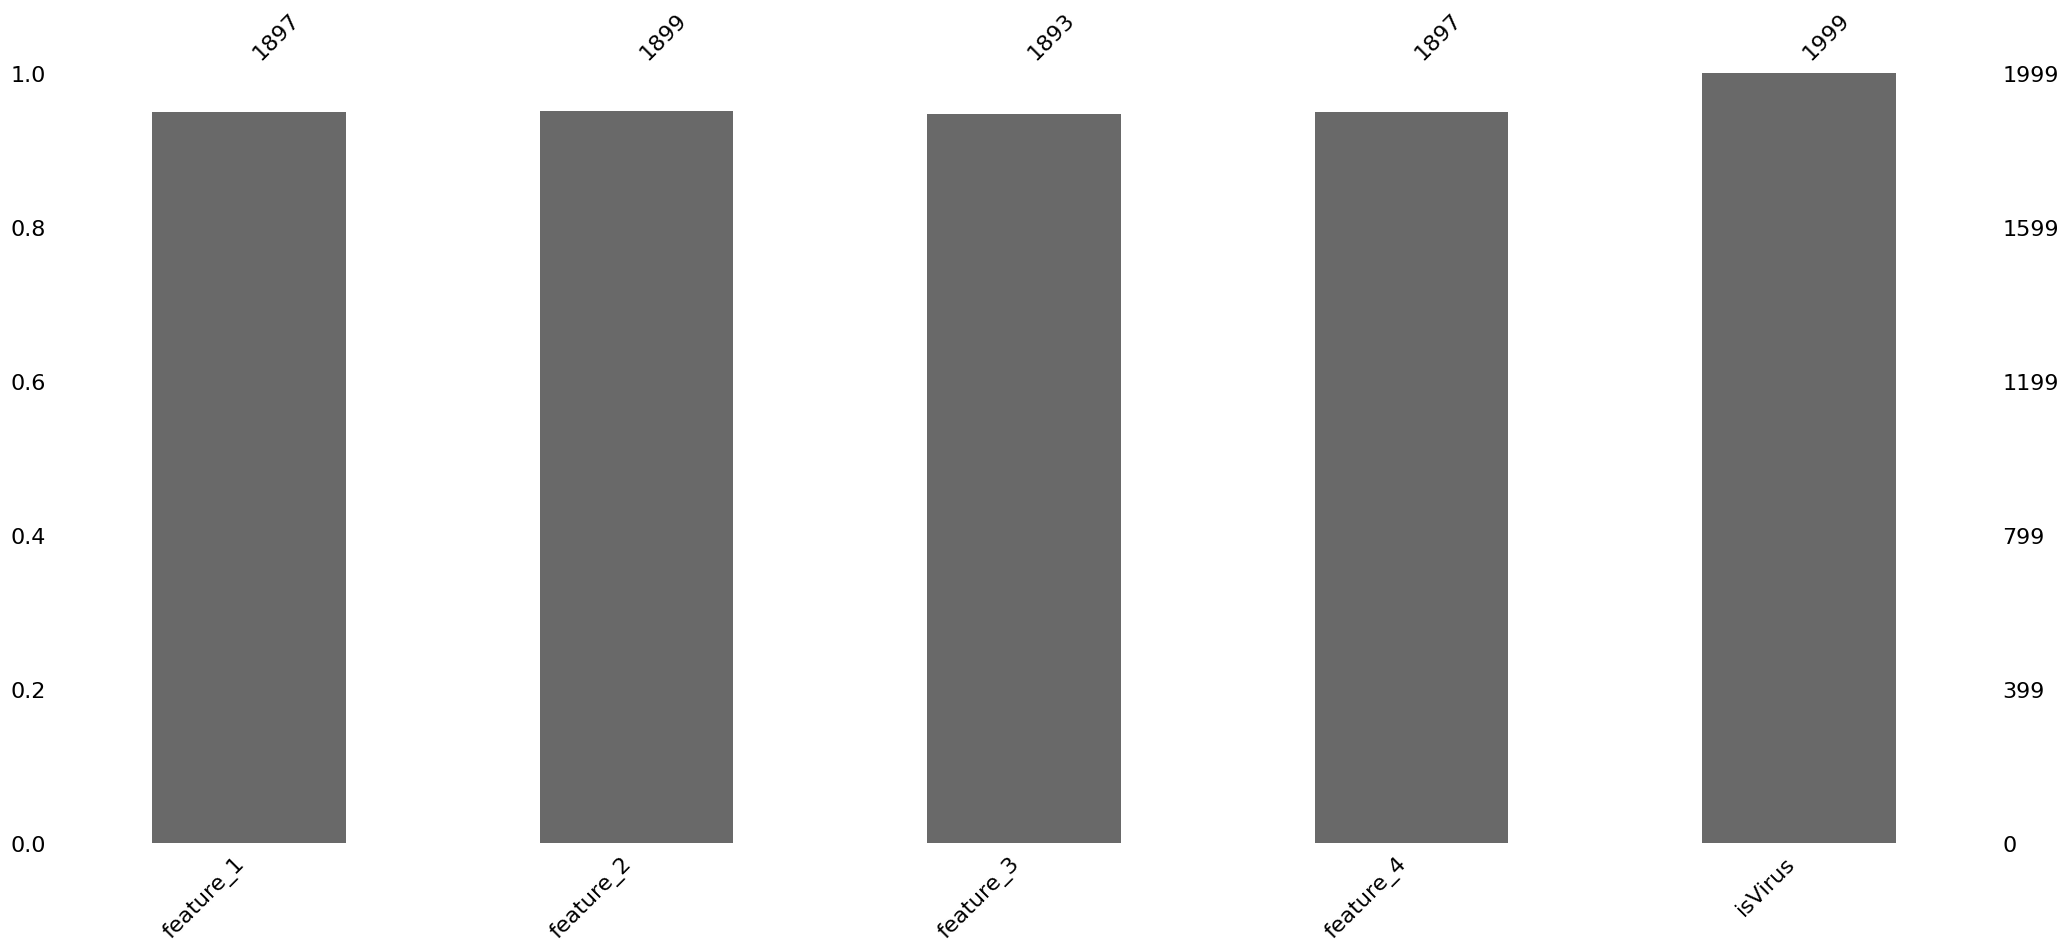

In [156]:
msno.bar(df);

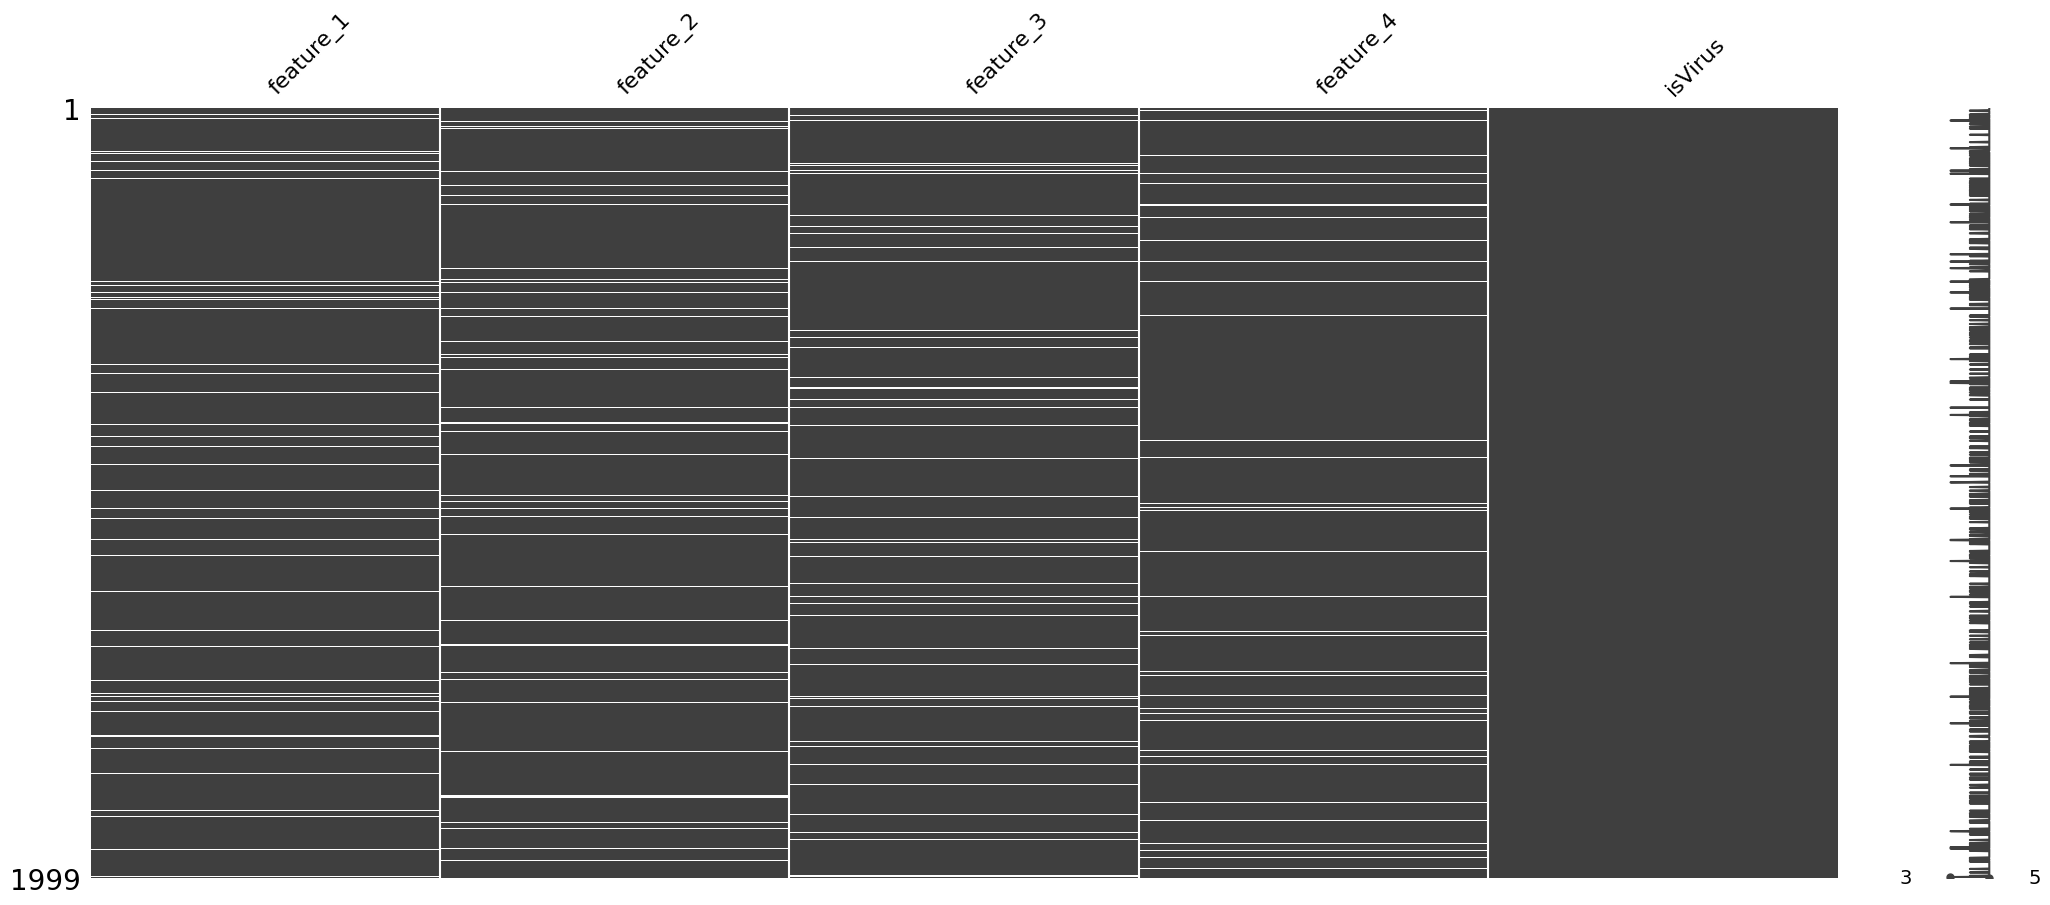

In [157]:
msno.matrix(df);

When we look at the missing values, there are almost equal numbers of missing values from each variable and there is no visible similarity between these values. It seems to occur randomly.

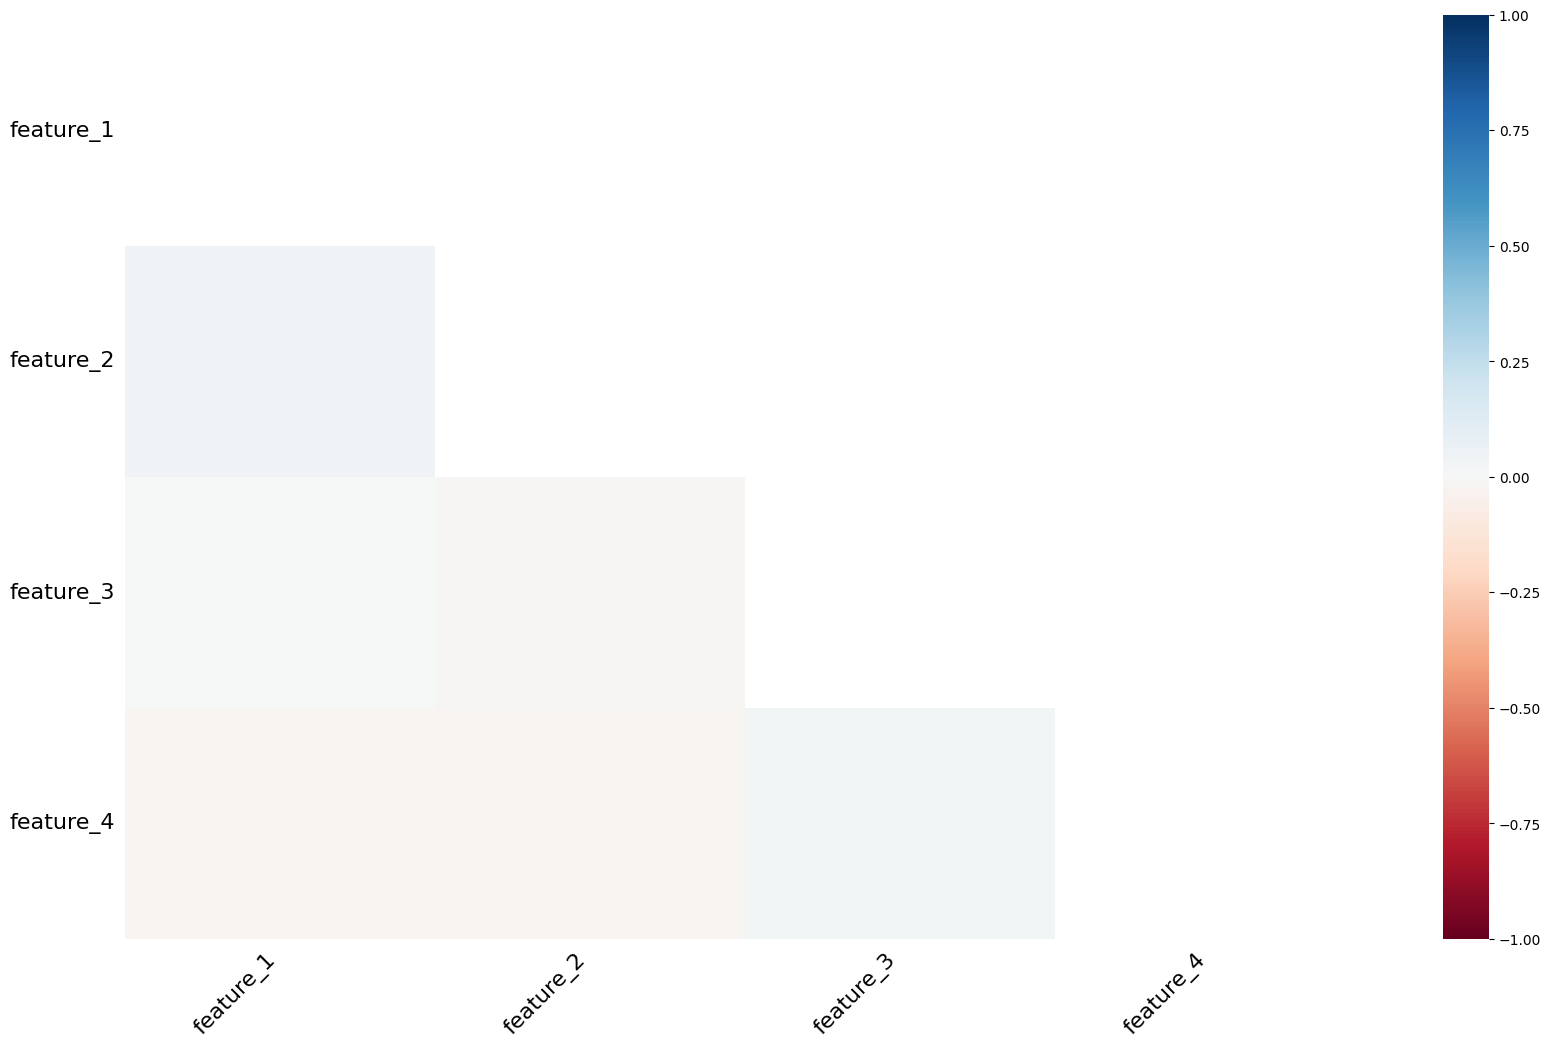

In [158]:
msno.heatmap(df);

It can be seen both visually and numerically that these missing values occur randomly.

Because of our missing values occurs randomly we can fill our missing values with mean or median. I believe mean would be fit good for our variables.

In [161]:
# Fill our na values with their means
df["feature_1"].fillna(df["feature_1"].mean(), inplace=True)
df["feature_2"].fillna(df["feature_2"].mean(), inplace=True)
df["feature_3"].fillna(df["feature_3"].mean(), inplace=True)
df["feature_4"].fillna(df["feature_4"].mean(), inplace=True)


In [162]:
df.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
isVirus      0
dtype: int64

## Modelling <br>
The target variable is a boolean value that indicates whether the data contains viruses. This is a classification problem. We can see that the features are numeric and the target variable is categorical.<br>
I will train models using different classification algorithms (Logistic Regression, Decision Trees and Random Forests). We will evaluate the performance of these models with metrics such as accuracy and F1 score.

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [167]:
# Scaling features
x = df.drop("isVirus", axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)

# Converting target variable from boolean to integer
y = df['isVirus'].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

# Modelling
models = {
    "Lojistik Regresyon": LogisticRegression(),
    "Karar Ağacı": DecisionTreeClassifier(),
    "Rastgele Orman": RandomForestClassifier()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Model train
    y_pred = model.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy score
    f1 = f1_score(y_test, y_pred)  # F1 score
    results.append((name, accuracy, f1))

    
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score'])
print(results_df.sort_values(by='F1 Score', ascending=False))

                Model  Accuracy  F1 Score
2      Rastgele Orman    0.8875  0.831461
1         Karar Ağacı    0.8500  0.777778
0  Lojistik Regresyon    0.6400  0.419355


According to these results, the Random Forest model showed the best performance in terms of both accuracy and F1 score. This model may have outperformed other models due to its ability to capture the complexity and relationships between features in your data set.